## QR 분해로 최소제곱법 구하기

9.499999999999988
10.000000000000004


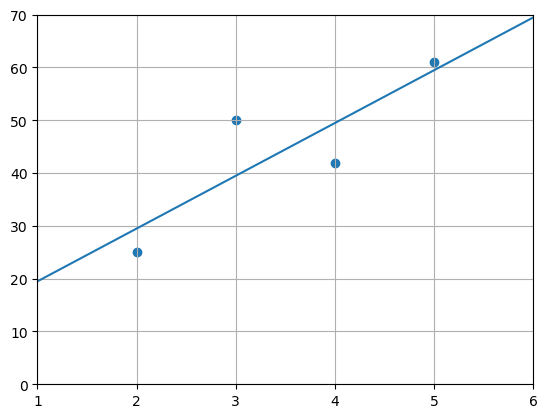

In [29]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([2,3,4,5])
linx = np.linspace(0,10,1000)

y = np.array([25,50,42,61])

# A 행렬 만들기 (bias 항 포함)
A = np.column_stack((np.ones_like(x), x))
Q,R = np.linalg.qr(A)
QTy = Q.T @ y
a,b = np.linalg.solve(R, QTy)
liny = linx * b + a


print(a)
print(b)
plt.scatter(x,y)
plt.plot(linx,liny)
plt.xlim(1,6)
plt.ylim(0,70)
plt.grid(True)




## 옵티마이저 - 경사 하강법 (Gradient Descent)
옵티마이저 알고리즘을 통해 적절한 W 와 b 를 찾아내는 과정을 머신 러닝에서 학습(training)이라고 부른다.

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


### 가중치와 편향의 초기화
선형회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일이다.
그리고 가장 잘 맞는 직선을 정의하는 것은 바로 W 와 b이다.
선형회귀의 목표는 가장 잘 맞는 직선을 정의하는 W와 b의 값을 찾는 것.


In [31]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
W = torch.zeros(1, requires_grad=True)
# 가중치 W를 출력
print(W)

tensor([0.], requires_grad=True)


In [ ]:
b = torch.zeros(1, requires_grad=True)
print(b)

In [32]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008